# Occultation of TYC 2369-02140-1 by Bettina

This occultation took place on Dec 24, 2020

In [1]:
## SORA package
from sora import Occultation, Body, Star, LightCurve, Observer
from sora.prediction import prediction
from sora.extra import draw_ellipse

## Other main packages
from astropy.time import Time
import astropy.units as u

## Usual packages
import numpy as np
import matplotlib.pylab as pl
import os
import sys

# Add the directory to sys.path
sys.path.append('/home/joshuabartkoske/AO/scripts')
from Occultations2 import Open_Two_Column_File

SORA version: 0.3.1


In [2]:
# First, let's consider the Solar System Body

bettina = Body(name='Bettina')
                #,ephem=['guidelines/input/bsp/Chariklo.bsp', 'guidelines/input/bsp/de438_small.bsp'])

print(bettina)

Obtaining data for Bettina from SBDB
###############################################################################
                             250 Bettina (A885 RA)                             
###############################################################################
Object Orbital Class: Main-belt Asteroid
Spectral Type:
    SMASS: Xk  [Reference: EAR-A-5-DDR-TAXONOMY-V4.0]
    Tholen: M [Reference: EAR-A-5-DDR-TAXONOMY-V4.0]
       Generally featureless spectrum with reddish slope; differences in subtle absorption features and/or spectral curvature and/or peak relative reflectance.
Discovered 1885-Sep-03 by Palisa, J. at Vienna

Physical parameters:
Diameter:
    121 +/- 2.212 km
    Reference: urn:nasa:pds:neowise_diameters_albedos::2.0[mainbelt] (http://adsabs.harvard.edu/abs/2014ApJ...791..121M), 
Rotation:
    5.0545 +/- 0 h
    Reference: LCDB (Rev. 2023-February); Warner et al., 2009, REFERENCE LIST:[Lagerkvist, C.-I.; Rickman, H. (1981) Moon Planets 24, 437-440.], [Di

In [3]:
pred = prediction(body=bettina, time_beg='2020-12-24',time_end='2020-12-25',mag_lim=14)
pred

Ephemeris was split in 1 parts for better search of stars

Searching occultations in part 1/1
Generating Ephemeris between 2020-12-24 00:00:00.000 and 2020-12-24 23:59:00.000 ...
    3 GaiaDR3 stars downloaded
Identifying occultations ...

1 occultations found.


        Use get_body("moon") instead. [sora.prediction.table]


Epoch,ICRS Star Coord at Epoch,Geocentric Object Position,C/A,P/A,Vel,Dist,G,long,loct,M-G-T,S-G-T,GaiaDR3 Source ID
,,,arcsec,deg,km / s,AU,mag,deg,hh:mm,deg,deg,
object,object,object,float64,float64,float64,float64,float64,float64,str5,float64,float64,str18
2020-12-24 10:15:55.860,04 00 37.75735 +35 52 56.50355,04 00 37.74891 +35 52 56.96813,0.476,347.55,-8.46,1.856,10.350,173,21:47,40,149,219334294660438528


In [ ]:
## ploting the occultation map

pred['2020-12-24 10:15:55.860'].plot_occ_map(nameimg='figures/observations/Bettina_20201224_map')

figures/observations/bettina_20201219_map.png generated


In [5]:
star_occ = Star(code='219334294660438528')

print(star_occ)

1 GaiaDR3 star found band={'G': 10.350464}
star coordinate at J2016.0: RA=4h00m37.76061s +/- 0.0189 mas, DEC=35d52m56.5507s +/- 0.0127 mas

GaiaDR3 star Source ID: 219334294660438528
ICRS star coordinate at J2016.0:
RA=4h00m37.76061s +/- 0.0189 mas, DEC=35d52m56.5507s +/- 0.0127 mas
pmRA=-7.437 +/- 0.026 mas/yr, pmDEC=-9.594 +/- 0.018 mas/yr
GaiaDR3 Proper motion corrected as suggested by Cantat-Gaudin & Brandt (2021) 
Plx=4.9388 +/- 0.0223 mas, Rad. Vel.=-15.96 +/- 0.49 km/s 

Magnitudes: G: 10.350, B: 10.984, V: 10.633, R: 10.400, J:  9.380, H:  9.155,
            K:  9.073

Apparent diameter from Kervella et. al (2004):
    V: 0.0661 mas, B: 0.0636 mas
Apparent diameter from van Belle (1999):
    sg: B: 0.0744 mas, V: 0.0777 mas
    ms: B: 0.0720 mas, V: 0.0610 mas
    vs: B: 0.1113 mas, V: 0.1006 mas


In [6]:
occ = Occultation(star=star_occ, body=bettina, time='2020-12-24 10:15:55.860')

print(occ)

        Use get_body("moon") instead. [sora.prediction.table]


Stellar occultation of star GaiaDR3 219334294660438528 by 250 Bettina (A885 RA).

Geocentric Closest Approach: 0.476 arcsec
Instant of CA: 2020-12-24 10:15:55.840
Position Angle: 347.55 deg
Geocentric shadow velocity: -8.45 km / s
Sun-Geocenter-Target angle:  149.03 deg
Moon-Geocenter-Target angle: 40.38 deg


No observations reported

###############################################################################
                                     STAR                                      
###############################################################################
GaiaDR3 star Source ID: 219334294660438528
ICRS star coordinate at J2016.0:
RA=4h00m37.76061s +/- 0.0189 mas, DEC=35d52m56.5507s +/- 0.0127 mas
pmRA=-7.437 +/- 0.026 mas/yr, pmDEC=-9.594 +/- 0.018 mas/yr
GaiaDR3 Proper motion corrected as suggested by Cantat-Gaudin & Brandt (2021) 
Plx=4.9388 +/- 0.0223 mas, Rad. Vel.=-15.96 +/- 0.49 km/s 

Magnitudes: G: 10.350, B: 10.984, V: 10.633, R: 10.400, J:  9.380, H:  9.155,
 

**After that, we instantiate the observers and their light curves**

**Observers**

Now let's define our observers, they can be setted manually or from the MPC database

In [7]:
### User

T1 = Observer(name='Telescope 1', lat='31 40 29.5572', lon='-110 57 3.456', height =1268)
T2 = Observer(name='Telescope 2', lat='31 40 28.2756', lon='-110 57 6.8976', height =1260)
T3 = Observer(name='Telescope 3', lat='31 40 31.8936', lon='-110 57 7.4844', height =1267)
T4 = Observer(name='Telescope 4', lat='31 40 30.2556', lon='-110 57 9.9756', height =1265)

print(T2)

print('\n')

### MPC Database Search

Site: Telescope 2
Geodetic coordinates: Lon: -110d57m06.8976s, Lat: 31d40m28.2756s, height: 1.260 km




In [10]:
# set up the objects for the occultation parameter calculation
from sora import EphemHorizons
bettina_time = Time("2020-12-24 10:15:55.860")
bettina_ephem = EphemHorizons(name='bettina')
bettina_star = Star(catalogue='gaiadr3', code='219334294660438528')

1 GaiaDR3 star found band={'G': 10.350464}
star coordinate at J2016.0: RA=4h00m37.76061s +/- 0.0189 mas, DEC=35d52m56.5507s +/- 0.0127 mas



In [11]:
from sora.prediction import occ_params
time_of_closest_approach, distance_of_closest_approach, position_angle_of_closest_approach, velocity_shadow, distance_to_object = occ_params(star=bettina_star, ephem=bettina_ephem, time=bettina_time, max_tdiff=600, reference_center=T1)

print("Occultation of TYC 2924-02100-1 by bettina over VERITAS")
print("--------------------------------------------------------")
print(f"Time of closest approach: {time_of_closest_approach}")
print(f"Distance of closest approach: {distance_of_closest_approach} ")
print(f"Position angle of closest approach: {position_angle_of_closest_approach}")
print(f"Velocity of occultation shadow: {velocity_shadow} ")
print(f"Distance to the occulting body: {distance_to_object.to(u.km)} or {distance_to_object}")

Occultation of TYC 2924-02100-1 by bettina over VERITAS
--------------------------------------------------------
Time of closest approach: 2020-12-24 10:05:09.900
Distance of closest approach: 0.011647189748489786 arcsec 
Position angle of closest approach: 346.3017259953651 deg
Velocity of occultation shadow: -8.615259151767532 km / s 
Distance to the occulting body: 277718113.42636544 km or 1.85643092463057 AU


**Light Curves**

Now let's define our light curves, they can be instanciated from different way: 
- **(i)** Manually with arrays containing the flux and the times; 
- **(ii)** Read an ASCII file; 
- **(iii)** Already obtained times.

**Telescope 1**

In [ ]:
T1_lc = LightCurve(name='Telescope 1 lc',file='/home/joshuabartkoske/AO/data/20201219/20201219-TYC2924_02100_1-T1-occultation-normalized.txt',
                    exptime=1/1200, usecols=[0,1], central_bandpass=0.415, delta_bandpass=0.2, tref="2020-12-19 06:15:02")

print(T1_lc)


Light curve name: Telescope 1 lc
Initial time: 2020-12-19 06:18:22.001 UTC
End time:     2020-12-19 06:19:12.000 UTC
Duration:     0.833 minutes
Time offset:  0.000 seconds

Exposure time:    0.0008 seconds
Cycle time:       0.0008 seconds
Num. data points: 60000


There is no occultation associated with this light curve.

Object LightCurve model was not fitted.

Immersion and emersion times were not fitted or instantiated.




/home/joshuabartkoske/mySORA_env/lib/python3.10/site-packages/sora/lightcurve/core.py:436: UserWarning: Exposure time (0.0008 seconds) higher than Cycle time (0.0008 seconds)
  warnings.warn('Exposure time ({:0.4f} seconds) higher than Cycle time ({:0.4f} seconds)'.


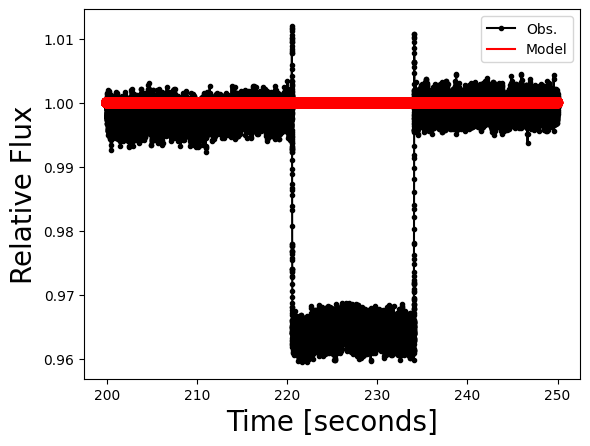

In [ ]:
T1_lc.plot_lc()
#pl.xlim(220.4,220.6)
pl.show()

The light curve occultation model considers some physical parameters from the event:
- Distance between the geocenter and the occulting object (AU);
- Star diameter at the occulting object's distance (km);
- Nominal Velocity of the event (km/s);

These parameters can be automatic calculated as we connect the `LightCurve` and the `Observer` to the `Ocultation` Object.


In [ ]:
#occ.chords.remove_chord(name='Telescope 1') If you need to update the chord, you need to remove it first
occ.chords.add_chord(observer=T1,lightcurve=T1_lc)

print(T1_lc)

Light curve name: Telescope 1 lc
Initial time: 2020-12-19 06:18:22.001 UTC
End time:     2020-12-19 06:19:12.000 UTC
Duration:     0.833 minutes
Time offset:  0.000 seconds

Exposure time:    0.0008 seconds
Cycle time:       0.0008 seconds
Num. data points: 60000

Bandpass:             0.415 +/- 0.200 microns
Object Distance:      1.44 AU
Used shadow velocity: 11.520 km/s
Fresnel scale:        0.018 seconds or 0.21 km
Stellar size effect:  0.003 seconds or 0.04 km

Object LightCurve model was not fitted.

Immersion and emersion times were not fitted or instantiated.




/home/joshuabartkoske/mySORA_env/lib/python3.10/site-packages/sora/body/core.py:345: UserWarning: H and/or G is not defined for 13 Egeria. Searching into JPL Horizons service
  warnings.warn('H and/or G is not defined for {}. Searching into JPL Horizons service'.format(self.shortname))


Now, appart from the `LightCurve` Object having the needed parameters, also the `Occultation` object can acess the information from this `Chord`.

In [ ]:
print(occ.chords)

-------------------------------------------------------------------------------
Site: Telescope 1
Geodetic coordinates: Lon: -110d57m03.456s, Lat: 31d40m29.5572s, height: 1.268 km
Target altitude: 72.0 deg
Target azimuth:  44.2 deg

Light curve name: Telescope 1 lc
Initial time: 2020-12-19 06:18:22.001 UTC
End time:     2020-12-19 06:19:12.000 UTC
Duration:     0.833 minutes
Time offset:  0.000 seconds

Exposure time:    0.0008 seconds
Cycle time:       0.0008 seconds
Num. data points: 60000

Bandpass:             0.415 +/- 0.200 microns
Object Distance:      1.44 AU
Used shadow velocity: 11.520 km/s
Fresnel scale:        0.018 seconds or 0.21 km
Stellar size effect:  0.003 seconds or 0.04 km

Object LightCurve model was not fitted.

Immersion and emersion times were not fitted or instantiated.




In [ ]:
## We fit the modelled light curve, using chi square minimization and Monte Carlo procedures

T1_lc.occ_lcfit?

Signature: T1_lc.occ_lcfit(**kwargs)
Docstring:
Monte Carlo chi square fit for occultations lightcurve.

Parameters
----------
tmin : `int`, `float`
    Minimum time to consider in the fit procedure, in seconds.

tmax : `int`, `float`
    Maximum time to consider in the fit procedure, in seconds.

flux_min : `int`, `float`, default=0
    Bottom flux (only object).

flux_max :`int`, `float`, default=1
    Base flux (object plus star).

immersion_time : `int`, `float`
    Initial guess for immersion time, in seconds.

emersion_time : `int`, `float`
    Initial guess for emersion time, in seconds.

opacity : `int`, `float`, default=1
    Initial guess for opacity. Opaque = 1, Transparent = 0.

delta_t : `int`, `float`
    Interval to fit immersion or emersion time.

dopacity : `int`, `float`, default=0
    Interval to fit opacity.

sigma : `int`, `float`, `array`, 'auto'
    Fluxes errors. If None it will use the `self.dflux`. If 'auto' it
    will calculate using the region outside the e

In [ ]:
## An automatic version can be used for cases where the occultation is obvious!!
## This process may take some minutes to run!!

T1_chi2 = T1_lc.occ_lcfit(loop=1000)
print('\n')
print(T1_chi2)

In [ ]:
## However, we believe that the user should set the parameters by hand!!
## The complete description of each parameter can be seen at the function Docstring.
## This process may take some minutes to run!!

T1_chi2 = T1_lc.occ_lcfit(tmin=218.0, tmax=236.0, 
                            immersion_time=220.55, 
                            emersion_time=234.08, 
                            delta_t=0.1, loop=5000)
print('\n')
print(T1_chi2)

LightCurve fit: |████████████████████████████████████████|  - 100% 


Minimum chi-square: 27374.985
Number of fitted points: 21600
Number of fitted parameters: 2
Minimum chi-square per degree of freedom: 1.267

immersion:
    1-sigma: 220.566 +/- 0.000
    3-sigma: 220.565 +/- 0.000

emersion:
    1-sigma: 234.079 +/- 0.000
    3-sigma: 234.077 +/- 0.002



**The user can visually acess the quality of the fit by ploting the** `ChiSquare` **object.**

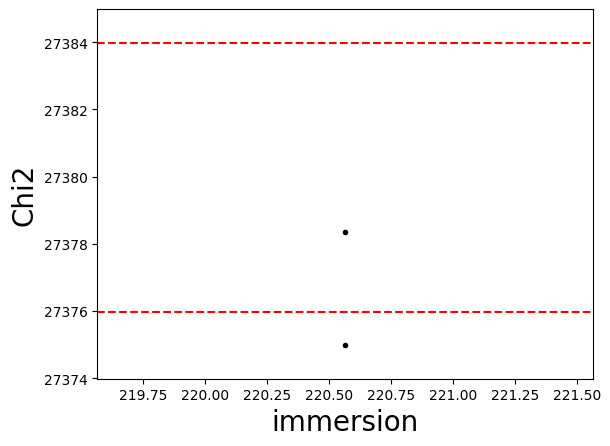

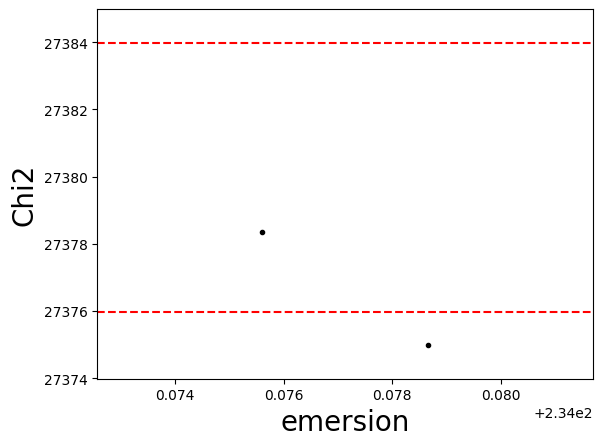

In [ ]:
T1_chi2.plot_chi2('immersion')
pl.xlim(220.566 - 1, 220.566 + 1)
pl.show()

T1_chi2.plot_chi2('emersion')
#pl.xlim(234.079 - 0.20, 234.079 + 0.20)
pl.show()


**Also, the user can visually acess the quality of the fit by ploting the** `LightCurve`.

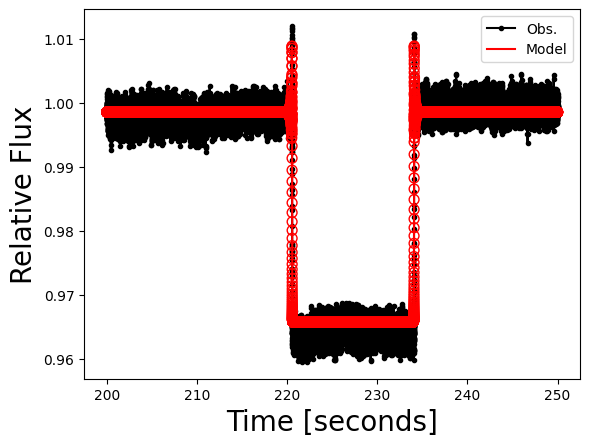

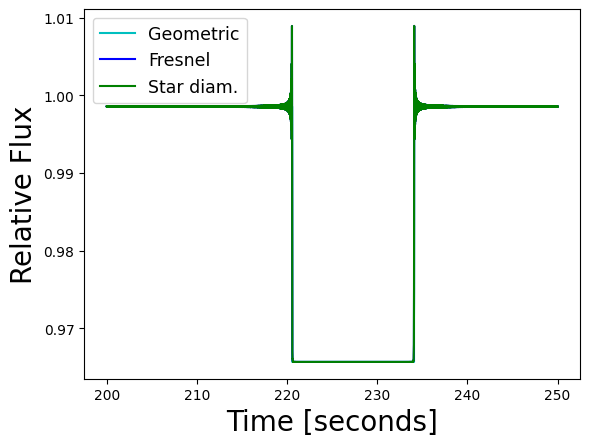

In [ ]:
T1_lc.plot_lc()
pl.show()

T1_lc.plot_model()
pl.legend(ncol=1, fontsize=12.5, loc=2)
pl.show()

In [ ]:
print(T1_lc)

Light curve name: Telescope 1 lc
Initial time: 2020-12-19 06:18:22.001 UTC
End time:     2020-12-19 06:19:12.000 UTC
Duration:     0.833 minutes
Time offset:  0.000 seconds

Exposure time:    0.0008 seconds
Cycle time:       0.0008 seconds
Num. data points: 60000

Bandpass:             0.415 +/- 0.200 microns
Object Distance:      1.44 AU
Used shadow velocity: 11.520 km/s
Fresnel scale:        0.018 seconds or 0.21 km
Stellar size effect:  0.003 seconds or 0.04 km
Inst. response:       0.001 seconds or 0.01 km
Dead time effect:     -0.000 seconds or -0.00 km
Model resolution:     0.000 seconds or 0.00 km
Modelled baseflux:    0.999
Modelled bottomflux:  0.966
Light curve sigma:    0.002

Immersion time: 2020-12-19 06:18:42.566 UTC +/- 0.000 seconds
Emersion time:  2020-12-19 06:18:56.079 UTC +/- 0.000 seconds

Monte Carlo chi square fit.

Minimum chi-square: 27374.985
Number of fitted points: 21600
Number of fitted parameters: 2
Minimum chi-square per degree of freedom: 1.267

immersio

**Finally, the user can visually see the chord in the Sky-plane using the** `Chord` **Object.**

/home/joshuabartkoske/mySORA_env/lib/python3.10/site-packages/sora/occultation/chordlist.py:238: UserWarning: Segment "error" was not found on any chord
  warnings.warn('Segment "{}" was not found on any chord'.format(segment))


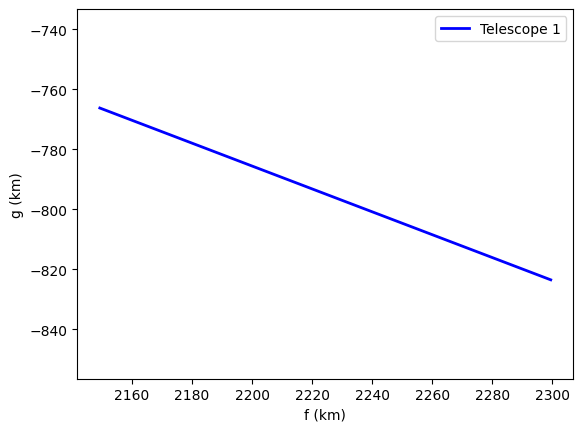

In [ ]:
occ.chords.plot_chords(segment='positive', color='blue')
occ.chords.plot_chords(segment='error', color='red')
pl.legend()
pl.show()

**Now, let's add the other chords of this occultation.**

In [ ]:
T2_lc = LightCurve(name='Telescope 2 lc',
                   file='/home/joshuabartkoske/AO/data/20201219/20201219-TYC2924_02100_1-T2-occultation-normalized.txt',
                    exptime=1/2400, 
                    usecols=[0,1], 
                    central_bandpass=0.415, delta_bandpass=0.2, 
                    initial_time="2020-12-19 06:14:51" , 
                    tref="2020-12-19 06:15:02")

occ.chords.add_chord(observer=ond,lightcurve=ond_lc)

<Chord: Onduruquea>

In [ ]:
print(occ.chords['Telescope 2'])

-------------------------------------------------------------------------------
Site: Onduruquea
Geodetic coordinates: Lon: 15d59m33.75s, Lat: -21d36m26.04s, height: 1.220 km
Target altitude: 56.1 deg
Target azimuth:  114.7 deg

Light curve name: Onduruquea lc
Initial time: 2017-06-22 21:11:52.175 UTC
End time:     2017-06-22 21:25:13.389 UTC
Duration:     13.354 minutes
Time offset:  0.000 seconds

Object LightCurve was not instantiated with time and flux.

Bandpass:             0.700 +/- 0.300 microns
Object Distance:      14.66 AU
Used shadow velocity: 22.004 km/s
Fresnel scale:        0.040 seconds or 0.87 km
Stellar size effect:  0.010 seconds or 0.23 km

Object LightCurve model was not fitted.

Immersion time: 2017-06-22 21:21:22.213 UTC +/- 0.010 seconds
Emersion time:  2017-06-22 21:21:33.824 UTC +/- 0.011 seconds




**Tivoli (Namibia)**

In [ ]:
tiv_lc = LightCurve(name='Tivoli lc',
                    initial_time='2017-06-22 21:16:00.094',
                    end_time ='2017-06-22 21:28:00.018',
                    immersion='2017-06-22 21:21:15.628',immersion_err=0.011,
                    emersion ='2017-06-22 21:21:19.988',emersion_err=0.038)

occ.chords.add_chord(observer=tiv, lightcurve=tiv_lc)

<Chord: Tivoli>

**Windhoek (Namibia)**

When there is two chords at the same stations is important to define their names as different values

In [ ]:
## C14
whc_c14_lc = LightCurve(name='Windhoek C14 lc',
                    initial_time='2017-06-22 21:12:48.250',
                    end_time ='2017-06-22 21:32:47.963',
                    immersion='2017-06-22 21:21:17.609',immersion_err=0.024,
                    emersion ='2017-06-22 21:21:27.564',emersion_err=0.026)

occ.chords.add_chord(name='Windhoek C14 lc', observer=whc, lightcurve=whc_c14_lc)

## D16
whc_d16_lc = LightCurve(name='Windhoek D16 lc',
                    initial_time='2017-06-22 21:20:01.884',
                    end_time ='2017-06-22 21:22:21.894',
                    immersion='2017-06-22 21:21:17.288',immersion_err=0.028,
                    emersion ='2017-06-22 21:21:27.228',emersion_err=0.034)

occ.chords.add_chord(name='Windhoek D16 lc', observer=whc, lightcurve=whc_d16_lc)


<Chord: Windhoek D16 lc>

**Hakos (Namibia)**

In [ ]:
#Also negatives chords can be added
hak_lc = LightCurve(name='Hakos lc',
                    initial_time='2017-06-22 21:10:19.461',
                    end_time ='2017-06-22 21:30:19.345')

occ.chords.add_chord(observer=hak, lightcurve=hak_lc)

<Chord: Hakos>

**Chords display and ellipse fit**

After all light curves were instanciated and/or fitted, the next step is to plot the chords and fit the elipse. 

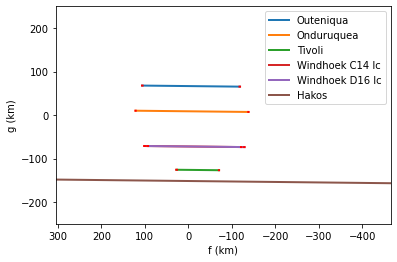

In [ ]:
occ.chords.plot_chords()
occ.chords.plot_chords(segment='error', color='red')

pl.legend(loc=1)
pl.xlim(+170,-330)
pl.ylim(-250,+250)
pl.show()

In [ ]:
## We can add known time offsets due to camera features

out_lc.dt = -0.150
ond_lc.dt = -0.190
tiv_lc.dt = -0.150
whc_c14_lc.dt = -0.375
whc_d16_lc.dt = +0.000
hak_lc.dt = -0.200

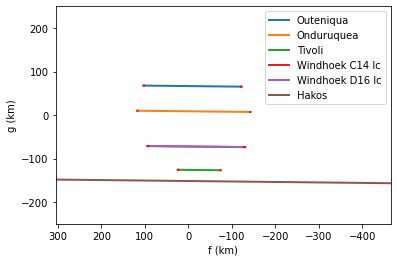

In [ ]:
occ.chords.plot_chords()
occ.chords.plot_chords(segment='error', color='red')

pl.legend(loc=1)
pl.xlim(+170,-330)
pl.ylim(-250,+250)
pl.show()

**The next step is to fit an ellipse to the chords**

In [ ]:
## We fit a ellipse using chi square minimization and Monte Carlo procedures, the 
## The complete description of each parameter can be seen at the function Docstring.

occ.fit_ellipse?

Signature: occ.fit_ellipse(**kwargs)
Docstring:
Fits an ellipse to given occultation using given parameters.

Parameters
----------
center_f : `int`, `float`, default=0
    The coordinate in f of the ellipse center.

center_g : `int`, `float`, default=0
    The coordinate in g of the ellipse center.

equatorial_radius : `int`, `float`
    The Equatorial radius (semi-major axis) of the ellipse.

oblateness : `int`, `float`, default=0
    The oblateness of the ellipse.

position_angle : `int`, `float`, default=0
    The pole position angle of the ellipse in degrees.
    Zero is in the North direction ('g-positive'). Positive clockwise.

dcenter_f : `int`, `float`
    Interval for coordinate f of the ellipse center.

dcenter_g : `int`, `float`
    Interval for coordinate g of the ellipse center.

dequatorial_radius `int`, `float`
    Interval for the Equatorial radius (semi-major axis) of the ellipse.

doblateness : `int`, `float`
    Interval for the oblateness of the ellipse

dposition_

In [ ]:
### This may take some minutes to run!!

ellipse_chi2  = occ.fit_ellipse(center_f=-15.046, center_g=-2.495, dcenter_f=3, dcenter_g=10, 
                                equatorial_radius=138, dequatorial_radius=3, oblateness=0.093, 
                                doblateness=0.02, position_angle=126, dposition_angle=10 ,loop=10000000,
                                dchi_min=10,number_chi=10000)


print(ellipse_chi2)

Minimum chi-square: 12.130
Number of fitted points: 10
Number of fitted parameters: 5
Minimum chi-square per degree of freedom: 2.426

center_f:
    1-sigma: -13.613 +/- 0.120
    3-sigma: -13.611 +/- 0.430

center_g:
    1-sigma: -2.094 +/- 0.499
    3-sigma: -2.089 +/- 1.626

equatorial_radius:
    1-sigma: 138.657 +/- 0.373
    3-sigma: 138.673 +/- 1.445

oblateness:
    1-sigma: 0.086 +/- 0.003
    3-sigma: 0.086 +/- 0.010

position_angle:
    1-sigma: 123.956 +/- 1.496
    3-sigma: 124.121 +/- 5.140



**Similar, to the** `LightCurve` **fit, the user can visually acess the quality of the fit by ploting the** `ChiSquare` **object.**

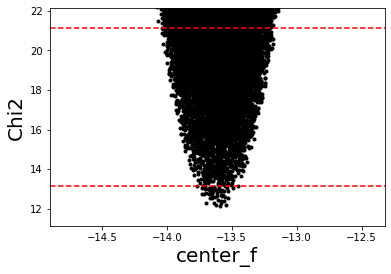

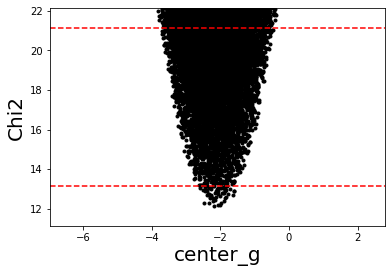

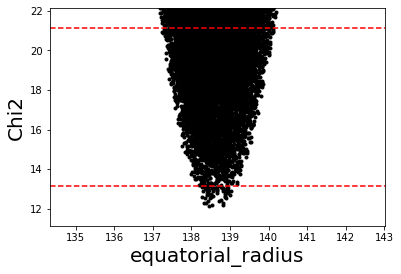

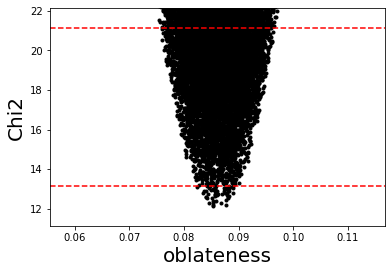

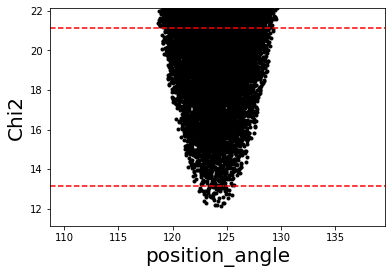

In [ ]:
ellipse_chi2.plot_chi2()

**Also, the user can visually acess the quality of the fit by ploting the** `Chords` **and the fitted ellipses.**

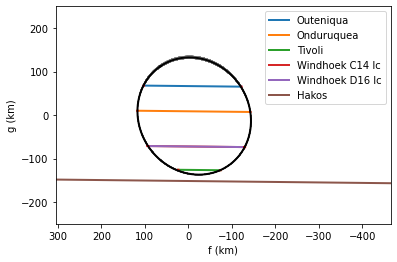

In [ ]:
occ.chords.plot_chords()
occ.chords.plot_chords(segment='error', color='red')

#plotting the best fitted ellipse, in black
draw_ellipse(**ellipse_chi2.get_values())

# ploting all the ellipses within 3-sigma, in gray
draw_ellipse(**ellipse_chi2.get_values(sigma=3),alpha=1.0)

pl.legend(loc=1)
pl.xlim(+170,-330)
pl.ylim(-250,+250)
pl.show()

**The resulting values can be acessed from the Dictionaries** `Occultation.fitted_params` **and** `Occultation.chi2_params`

In [ ]:
occ.fitted_params

{'equatorial_radius': [138.65650796361007, 0.3729805506807651],
 'center_f': [-13.612927096827903, 0.11996518649955146],
 'center_g': [-2.0936385736495167, 0.4992405703706848],
 'oblateness': [0.08573692161473534, 0.003305360393147015],
 'position_angle': [123.95618703950413, 1.4957816035600828]}

In [ ]:
occ.chi2_params

{'chord_name': ['Outeniqua_immersion',
  'Outeniqua_emersion',
  'Onduruquea_immersion',
  'Onduruquea_emersion',
  'Tivoli_immersion',
  'Tivoli_emersion',
  'Windhoek C14 lc_immersion',
  'Windhoek C14 lc_emersion',
  'Windhoek D16 lc_immersion',
  'Windhoek D16 lc_emersion'],
 'radial_dispersion': array([ 0.64886238, -0.82234285, -0.20941195,  0.0507056 ,  0.14404744,
        -2.02271261,  0.3135147 , -0.1926379 , -0.76516855,  0.53220478]),
 'position_angle': array([301.95754708,  58.93979955, 274.10063776,  84.70868609,
        205.80484092, 163.27224646, 238.45346645, 123.09039914,
        238.19141651, 122.87262257]),
 'radial_error': array([0.60995255, 0.64472971, 0.22353256, 0.24588816, 0.24592892,
        0.8495755 , 0.53652931, 0.58124429, 0.62595044, 0.76008871]),
 'chi2_min': 12.129614721820191,
 'nparam': 5,
 'npts': 10}

**Besides the size and shape of the body the astrometrical positions obtained using stellar occultation  is also a relevant result from the occultation and it has a precision that can be compared with space probes results (few km)**


In [ ]:
occ.new_astrometric_position()

Ephemeris offset (km): X = -13.6 km +/- 0.1 km; Y = -2.1 km +/- 0.5 km
Ephemeris offset (mas): da_cos_dec = -1.280 +/- 0.011; d_dec = -0.197 +/- 0.047

Astrometric object position at time 2017-06-22 21:18:48.200 for reference 'geocenter'
RA = 18 55 15.6523911 +/- 0.034 mas; DEC = -31 31 21.622094 +/- 0.058 mas


**After the instanciation of the** `Chords` **and the ellipse fit, the posfit occultation map can be plotted.**

In [ ]:
occ.plot_occ_map(centermap_delta=[-3500,+400],zoom=20,nameimg='guidelines/figures/map_posfit')

Projected shadow radius = 135.0 km
guidelines/figures/map_posfit.png generated


<img src='guidelines/figures/map_posfit.png' style='width:600px;height:500px'/>


**Finally, the log contains all the details**

In [ ]:
print(occ)

Stellar occultation of star GaiaDR3 6760223758801661440 by 10199 Chariklo (1997 CU26).

Geocentric Closest Approach: 0.049 arcsec
Instant of CA: 2017-06-22 21:18:48.200
Position Angle: 359.72 deg
Geocentric shadow velocity: -22.00 km / s
Sun-Geocenter-Target angle:  166.42 deg
Moon-Geocenter-Target angle: 149.11 deg


5 positive observations
1 negative observations

###############################################################################
                                     STAR                                      
###############################################################################
GaiaDR3 star Source ID: 6760223758801661440
ICRS star coordinate at J2016.0:
RA=18h55m15.65210s +/- 0.0197 mas, DEC=-31d31m21.6676s +/- 0.0180 mas
pmRA=3.556 +/- 0.025 mas/yr, pmDEC=-2.050 +/- 0.020 mas/yr
GaiaDR3 Proper motion corrected as suggested by Cantat-Gaudin & Brandt (2021) 
Plx=0.2121 +/- 0.0228 mas, Rad. Vel.=-40.49 +/- 3.73 km/s 

Magnitudes: G: 14.224, B: 14.320, V: 13.530, R

**You can find more information about each Class at their specific Jupyter-Notebook.**

**The END**